In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 第一部分 一元线性回归

1. 读取文件里的数据，进行绘图
2. 按模型要求，准备数据
3. 梯度下降，实现成本函数并测试，实现梯度下降算法
4. 回归直线绘图，模型应用做预测
5. 误差变化过程绘图。3d和轮廓。
6. 与sciki-learn结果比较

In [3]:
#step1
data = pd.read_csv("file://127.0.0.1/E:\ML\作业\ex1\ex1data1.txt", \
                   names=['population','profit'],encoding='utf-8')

In [4]:
len(data)
print(data.head(3))

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620


In [5]:
import matplotlib.font_manager as font_manager

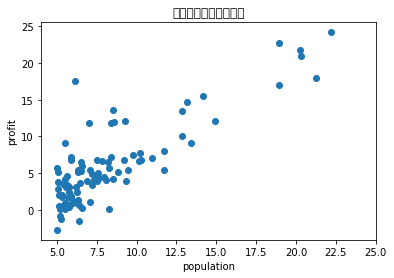

In [6]:
#step2
# ziti = font_manager.FontProperties(fname="file://127.0.0.1/C://Windows/Fonts/STXINWEI.TTF")

plt.scatter(data.population.values, data.profit.values)
plt.xlabel('population')
plt.ylabel('profit')
plt.xlim(4,25)
plt.title(u'城市人口与收益散点图')


In [7]:
# step3

x = pd.DataFrame()
x['x0'] = np.ones(len(data))
x['x1'] = data.population
x = x.values

y = data.profit.values

theta = np.zeros(2)

print(type(x), type(y), type(theta))

assert type(x) == np.ndarray and x.shape == (97,2)
assert type(y) == np.ndarray and y.shape == (97,)
assert type(theta) == np.ndarray and theta.shape == (2,)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [25]:
def compute_cost(X, y, theta):
    temp = (X * theta) - y
    haha = np.sum(np.power(temp,2))/(2*X.shape[0])
#     print(haha)
    return haha

In [26]:
j_val = compute_cost(np.matrix(x),np.matrix(y).T,np.matrix(theta).T)
print(j_val)

32.0727338775


In [34]:
iterations = 1500
alpha = 0.01

**梯度下降**

输入：矩阵X _mxn_，矩阵y _mx1_，权重theta _nx1_

In [30]:
def gradient_descent(X,y,theta,alpha,iteratoins):
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iterations)
    
    m = X.shape[0]
    for i in range(iterations):
        error = (X * theta) - y
#         print(error)
        for j in range(theta.shape[0]):
#             print((X)[:,1])
            gradient = np.sum(np.multiply(error, (X[:,j]))) / m
            temp[j,0] = temp[j,0] - (alpha * gradient)
            
        theta = temp
#         print(X, y, theta)
#         print(theta)
        cost[i] = compute_cost(X, y , theta)
            
    return theta, cost
        

In [35]:
g, cost = gradient_descent(np.matrix(x), np.matrix(y).T, np.matrix(theta).T, alpha, iterations)

In [37]:
g

matrix([[-3.63029144],
        [ 1.16636235]])

In [39]:
print(compute_cost(np.matrix(x), np.matrix(y).T, g))

4.48338825659


In [52]:
#step4
xrange = np.linspace(data.population.min(), data.population.max(), 100)
xrange.shape = (100,1) 
xrange = np.insert(xrange, 0, 1,axis=1)
yrange = np.matrix(xrange) * np.matrix(g)

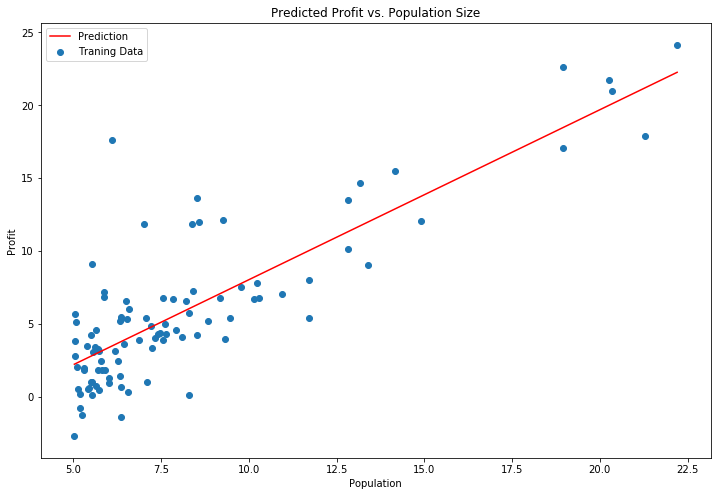

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xrange[:,1:], yrange, 'r', label='Prediction')

ax.scatter(data.population, data.profit, label='Traning Data')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
ax.legend(loc='best')

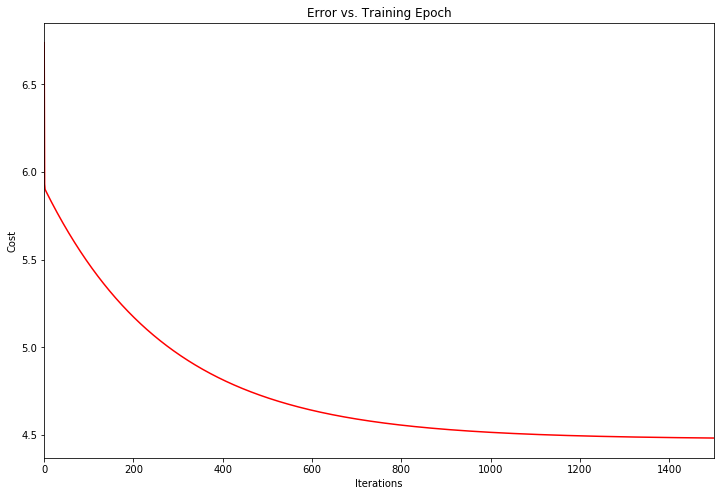

In [62]:
#代价随迭代次数变化
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_xlim(0, iterations)
ax.set_title('Error vs. Training Epoch')

In [63]:
#sklearn比对
from sklearn import linear_model

In [73]:
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [78]:
model.coef_

array([-3.89578088,  1.19303364])

In [87]:
compute_cost(np.matrix(x),np.matrix(y).T,np.matrix(model.coef_).T)

4.4769713759751788

In [80]:
f1 = model.predict(x).flatten() 

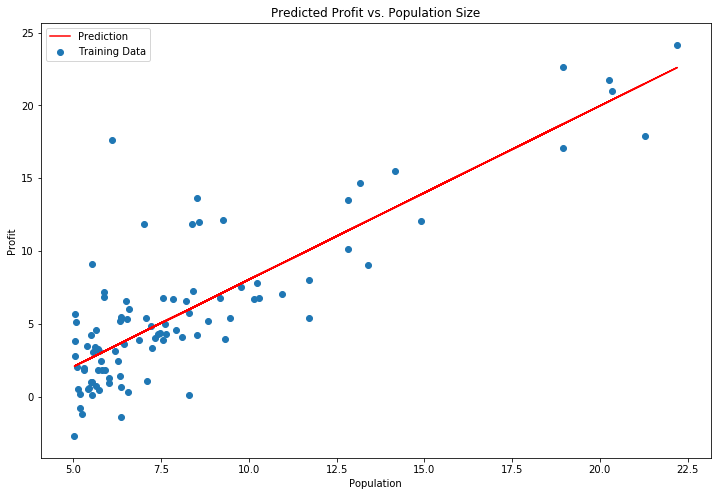

In [86]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x[:,1],f1, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')